# **Reinforcement Learning Q-learning Algorithm Assignment**
#### **Name: Jasser Abdelfattah**
#### **UH ID: 21033101**

## Define an Agent Class

### Q-Learning Algorithm

Q-learning is a model-free reinforcement learning algorithm to learn the value of an action in a particular state. The agent learns the optimal policy by updating the Q-values using the Bellman equation:

$$
Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right]
$$

Where:
- $Q(s, a)$ is the Q-value for state $s$ and action $a$.
- $\alpha$ is the learning rate.
- $r$ is the reward received after taking action $a$ in state $s$.
- $\gamma$ is the discount factor.
- $s'$ is the next state.
- $\max_{a'} Q(s', a')$ is the maximum Q-value for the next state $s'$ over all possible actions $a'$.

In [16]:
import numpy as np
import random

In [17]:
class Agent:
    """
    A reinforcement learning agent that uses the Q-learning algorithm.
    Attributes:
        state_size (int): The number of possible states.
        action_size (int): The number of possible actions.
        epsilon (float): The exploration rate (probability of choosing a random action).
        alpha (float): The learning rate.
        gamma (float): The discount factor.
        q_table (np.ndarray): The Q-table storing Q-values for state-action pairs.
    Methods:
        initialize_q_table():
            Initializes the Q-table with zeros.
        select_action(state):
            Selects an action using the epsilon-greedy policy.
        update_q_value(state, action, reward, next_state):
            Updates the Q-value for a given state-action pair using the Q-learning update rule.
        get_reward(state, goal_state):
            Returns the reward for a given state.
    """

    def __init__(self, state_size, action_size, epsilon=0.1, alpha=0.1, gamma=0.9):
        self.state_size = state_size
        self.action_size = action_size
        self.epsilon = epsilon  # Exploration rate
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.q_table = self.initialize_q_table()

    def initialize_q_table(self):
        # Initialize Q-values for state-action pairs to zero
        return np.zeros((self.state_size, self.action_size))

    def select_action(self, state):
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < self.epsilon:
            # Explore: select a random action
            return random.randint(0, self.action_size - 1)
        else:
            # Exploit: select the action with max Q-value
            return np.argmax(self.q_table[state])

    def update_q_value(self, state, action, reward, next_state):
        # Q-learning update rule
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error

    def get_reward(self, state, goal_state):
        # Define rewards
        if state == goal_state:
            return 20  # Reward for reaching the goal
        else:
            return -1  # Penalty for each move made that does not reach the goal

In [18]:
state_size = 100  
action_size = 4   
agent = Agent(state_size, action_size)

# Example interaction with the environment
current_state = 0
goal_state = 99
for _ in range(100):  
    action = agent.select_action(current_state)
    next_state = (current_state + action) % state_size  
    reward = agent.get_reward(next_state, goal_state)
    agent.update_q_value(current_state, action, reward, next_state)
    current_state = next_state
print(agent.q_table)

[[-0.1 -0.1  0.   0. ]
 [-0.1  0.   0.  -0.1]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1  0.  -0.1  0. ]
 [ 0.   0.   0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [ 0.   0.   0.  -0.1]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [ 0.  -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1  0.   0. ]
 [-0.1 -0.1

## Define an Environment Class

In [19]:
class Environment:
    """
    A class to represent a grid-based environment for reinforcement learning.
    Attributes
    ----------
    grid_size : int
        The size of the grid (default is 10).
    grid : np.ndarray
        The grid representing the environment.
    obstacles : list of tuple
        The list of coordinates representing obstacles in the grid.
    goal_state : tuple
        The coordinates of the goal state in the grid.
    Methods
    -------
    __init__(grid_size=10):
        Initializes the environment with a given grid size.
    initialize_grid():
        Places obstacles in the grid.
    is_valid_move(state, action):
        Checks if a move is valid and returns the new state.
    reset():
        Resets the environment to the initial state.
    step(state, action):
        Takes a step in the environment based on the given action.
    get_reward(state):
        Returns the reward for a given state.
    """

    def __init__(self, grid_size=10):
        self.grid_size = grid_size
        self.grid = np.zeros((grid_size, grid_size))
        self.obstacles = [(3, 3), (3, 4), (4, 3), (4, 4)]  # Example obstacles
        self.goal_state = (grid_size - 1, grid_size - 1)
        self.initialize_grid()

    def initialize_grid(self):
        # Place obstacles in the grid
        for obstacle in self.obstacles:
            self.grid[obstacle] = -1  # Mark obstacles with -1

    def is_valid_move(self, state, action):
        x, y = state
        if action == 0:  # Move up
            x -= 1
        elif action == 1:  # Move down
            x += 1
        elif action == 2:  # Move left
            y -= 1
        elif action == 3:  # Move right
            y += 1

        # Check if the new position is within the grid and not an obstacle
        if (
            0 <= x < self.grid_size
            and 0 <= y < self.grid_size
            and self.grid[x, y] != -1
        ):
            return (x, y)
        else:
            return state  # Invalid move, stay in the same position

    def reset(self):
        # Reset the environment to the initial state
        return (0, 0)  # Starting position

    def step(self, state, action):
        next_state = self.is_valid_move(state, action)
        reward = self.get_reward(next_state)
        done = next_state == self.goal_state
        return next_state, reward, done

    def get_reward(self, state):
        if state == self.goal_state:
            return 20  # Reward for reaching the goal
        else:
            return -1  # Penalty for each move made that does not reach the goal

In [20]:
env = Environment()
state = env.reset()
done = False
while not done:
	action = np.random.choice(4)  
	next_state, reward, done = env.step(state, action)
	print(f"State: {state}, Action: {action}, Next State: {next_state}, Reward: {reward}")
	state = next_state
print("Goal reached!")

State: (0, 0), Action: 2, Next State: (0, 0), Reward: -1
State: (0, 0), Action: 0, Next State: (0, 0), Reward: -1
State: (0, 0), Action: 2, Next State: (0, 0), Reward: -1
State: (0, 0), Action: 1, Next State: (1, 0), Reward: -1
State: (1, 0), Action: 2, Next State: (1, 0), Reward: -1
State: (1, 0), Action: 2, Next State: (1, 0), Reward: -1
State: (1, 0), Action: 0, Next State: (0, 0), Reward: -1
State: (0, 0), Action: 3, Next State: (0, 1), Reward: -1
State: (0, 1), Action: 0, Next State: (0, 1), Reward: -1
State: (0, 1), Action: 3, Next State: (0, 2), Reward: -1
State: (0, 2), Action: 1, Next State: (1, 2), Reward: -1
State: (1, 2), Action: 1, Next State: (2, 2), Reward: -1
State: (2, 2), Action: 0, Next State: (1, 2), Reward: -1
State: (1, 2), Action: 3, Next State: (1, 3), Reward: -1
State: (1, 3), Action: 1, Next State: (2, 3), Reward: -1
State: (2, 3), Action: 3, Next State: (2, 4), Reward: -1
State: (2, 4), Action: 0, Next State: (1, 4), Reward: -1
State: (1, 4), Action: 3, Next 

##  Run the Simulation

In [21]:
import os
import csv

In [22]:
def run_single_agent(episodes):
    """
    Runs a single agent in the environment for a specified number of episodes.
    Args:
        episodes (int): The number of episodes to run the agent.
    Returns:
        tuple: A tuple containing two lists:
            - episode_lengths (list of int): The number of steps taken in each episode.
            - total_rewards (list of float): The total reward accumulated in each episode.
    """
    env = Environment()
    agent = Agent(state_size=env.grid_size**2, action_size=4)
    episode_lengths = []
    total_rewards = []

    for episode in range(episodes):
        state = env.reset()
        state_index = state[0] * env.grid_size + state[1]
        total_reward = 0
        steps = 0
        done = False

        while not done:
            action = agent.select_action(state_index)
            next_state, reward, done = env.step(state, action)
            next_state_index = next_state[0] * env.grid_size + next_state[1]
            agent.update_q_value(state_index, action, reward, next_state_index)
            state = next_state
            state_index = next_state_index
            total_reward += reward
            steps += 1

        episode_lengths.append(steps)
        total_rewards.append(total_reward)

    return episode_lengths, total_rewards

In [23]:
def run_multi_agent(episodes, shared_q_table=True):
    """
    Run a multi-agent reinforcement learning simulation.
    Parameters:
    episodes (int): The number of episodes to run the simulation for.
    shared_q_table (bool): If True, all agents will share the same Q-table. Default is True.
    Returns:
    tuple: A tuple containing:
        - episode_positions (list): A list of lists where each sublist contains the final positions of the agents for each episode.
        - episode_q_values (list): A list of lists where each sublist contains the Q-tables of the agents for each episode.
        - total_rewards_per_episode (list): A list containing the total rewards accumulated by all agents for each episode.
    """
    env = Environment()
    agents = [Agent(state_size=env.grid_size**2, action_size=4) for _ in range(4)]
    if shared_q_table:
        shared_q_table = np.zeros((env.grid_size**2, 4))
        for agent in agents:
            agent.q_table = shared_q_table

    episode_positions = []
    episode_q_values = []
    total_rewards_per_episode = []

    for episode in range(episodes):
        states = [env.reset() for _ in range(4)]
        state_indices = [state[0] * env.grid_size + state[1] for state in states]
        total_rewards = [0] * 4
        steps = 0
        done = [False] * 4

        while not all(done):
            for i, agent in enumerate(agents):
                if done[i]:
                    continue
                action = agent.select_action(state_indices[i])
                next_state, reward, done[i] = env.step(states[i], action)
                next_state_index = next_state[0] * env.grid_size + next_state[1]
                agent.update_q_value(state_indices[i], action, reward, next_state_index)
                states[i] = next_state
                state_indices[i] = next_state_index
                total_rewards[i] += reward
                steps += 1

        episode_positions.append([state_indices[i] for i in range(4)])
        episode_q_values.append([agent.q_table.copy() for agent in agents])
        total_rewards_per_episode.append(sum(total_rewards))

    return episode_positions, episode_q_values, total_rewards_per_episode

## Storing the Data

In [24]:
# Create directories for storing results
os.makedirs('results/single_agent', exist_ok=True)
os.makedirs('results/multi_agent', exist_ok=True)

In [25]:
# Run the single-agent simulation for 200, 800, and 1000 episodes
single_agent_rewards = {}
for episodes in [200, 800, 1000]:
    episode_lengths, total_rewards = run_single_agent(episodes)
    single_agent_rewards[episodes] = total_rewards
    with open(
        f"results/single_agent/single_agent_results_{episodes}_episodes.csv",
        "w",
        newline="",
    ) as file:
        writer = csv.writer(file)
        writer.writerow(["Episode", "Total Reward", "Episode Length"])
        for i in range(episodes):
            writer.writerow([i + 1, total_rewards[i], episode_lengths[i]])

# Run the multi-agent simulation for 200, 800, and 1000 episodes
multi_agent_rewards = {}
for episodes in [200, 800, 1000]:
    episode_positions, episode_q_values, total_rewards_per_episode = run_multi_agent(
        episodes, shared_q_table=True
    )
    multi_agent_rewards[episodes] = total_rewards_per_episode
    with open(
        f"results/multi_agent/multi_agent_results_{episodes}_episodes.csv",
        "w",
        newline="",
    ) as file:
        writer = csv.writer(file)
        writer.writerow(["Episode", "Agent", "Position", "Q-Values","Total Reward"])
        for episode in range(episodes):
            for i in range(4):
                writer.writerow(
                    [
                        episode + 1,
                        f"Agent_{i}",
                        episode_positions[episode][i],
                        episode_q_values[episode][i].tolist(),
                        total_rewards_per_episode[episode]
                    ]
                )

## EDA (Exploratory data analysis)

In [26]:
import matplotlib.pyplot as plt

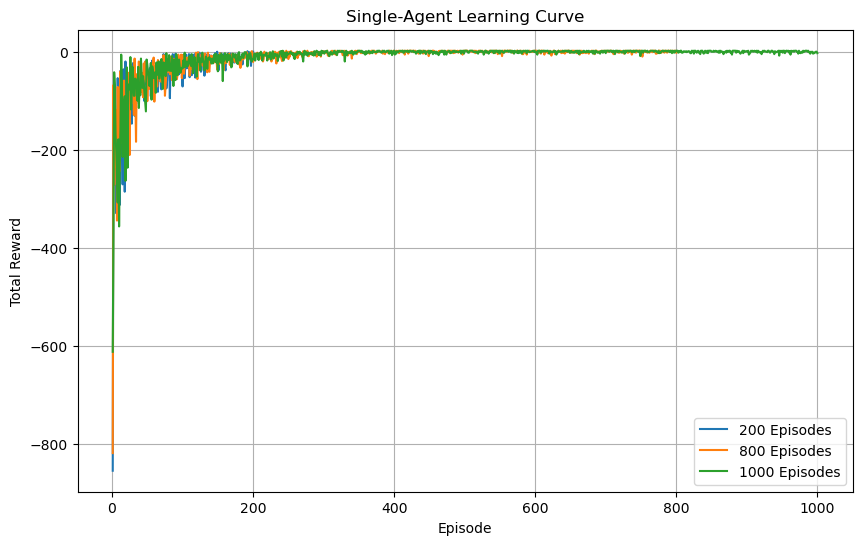

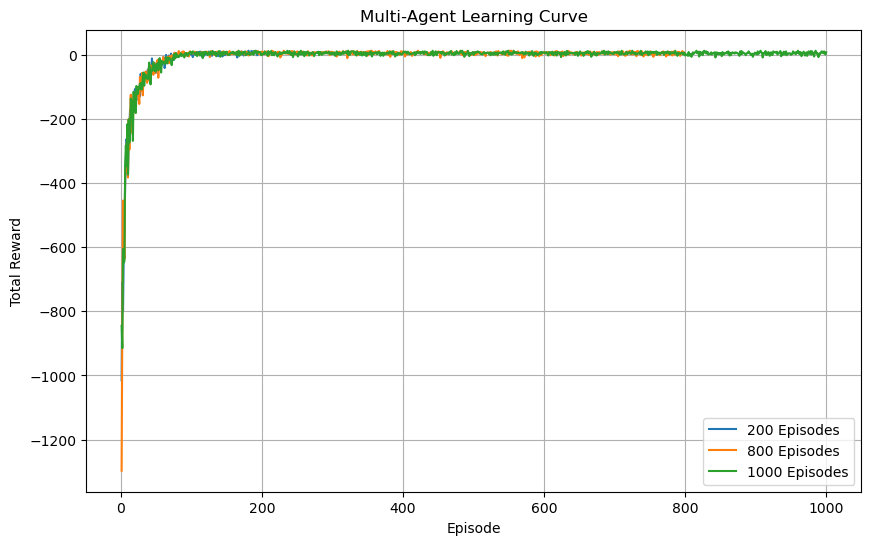

In [27]:
# Plotting the learning curves
def plot_learning_curve(rewards, title, filename):
    """
    Plots the learning curve of total rewards over episodes.

    Args:
        rewards (dict): A dictionary where keys are the number of episodes (int)
                        and values are lists of total rewards for each episode.
        title (str): The title of the plot.
        filename (str): The filename to save the plot as an image.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    for episodes, total_rewards in rewards.items():
        plt.plot(range(1, episodes + 1), total_rewards, label=f"{episodes} Episodes")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(filename)
    plt.show()


# Plot learning curves for single-agent
plot_learning_curve(
    single_agent_rewards,
    "Single-Agent Learning Curve",
    "results/single_agent/single_agent_learning_curve.png",
)

# Plot learning curves for multi-agent
plot_learning_curve(
    multi_agent_rewards,
    "Multi-Agent Learning Curve",
    "results/multi_agent/multi_agent_learning_curve.png",
)

## Reading Csv Files

In [28]:
import pandas as pd

In [29]:
single_df = pd.read_csv("results/single_agent/single_agent_results_200_episodes.csv")
pd.concat([single_df.head(), single_df.tail()])

,Episode,Total Reward,Episode Length
0,1,-855,876
1,2,-99,120
2,3,-135,156
3,4,-137,158
4,5,-220,241
195,196,-5,26
196,197,-28,49
197,198,-7,28
198,199,-10,31
199,200,1,20


In [30]:
multi_df = pd.read_csv("results/multi_agent/multi_agent_results_200_episodes.csv")
pd.concat([multi_df.head(), multi_df.tail()])

,Episode,Agent,Position,Q-Values,Total Reward
0,1,Agent_0,99,"[[-0.5822546509, -0.519355, -0.490099501, -0.5...",-1015
1,1,Agent_1,99,"[[-0.5822546509, -0.519355, -0.490099501, -0.5...",-1015
2,1,Agent_2,99,"[[-0.5822546509, -0.519355, -0.490099501, -0.5...",-1015
3,1,Agent_3,99,"[[-0.5822546509, -0.519355, -0.490099501, -0.5...",-1015
4,2,Agent_0,99,"[[-0.937987747721353, -0.9769565893285089, -0....",-710
795,199,Agent_3,99,"[[-5.752387097989278, -6.2427428375305265, -5....",8
796,200,Agent_0,99,"[[-5.752387097989278, -6.2427428375305265, -5....",3
797,200,Agent_1,99,"[[-5.752387097989278, -6.2427428375305265, -5....",3
798,200,Agent_2,99,"[[-5.752387097989278, -6.2427428375305265, -5....",3
799,200,Agent_3,99,"[[-5.752387097989278, -6.2427428375305265, -5....",3
